<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/6_The_MA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar los paquetes correspondientes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns

sns.set()


Importando datos y tratamiento previo

In [ ]:
#Procedemos a importar los datos
# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)

df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

Carga exitosa del archivo CSV.


In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

La prueba LLR

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Creación de devoluciones

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

ACF para devoluciones

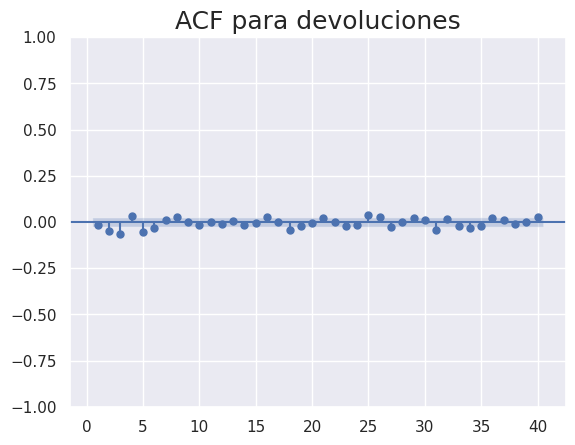

In [ ]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF para devoluciones", size=18)
plt.show()

MA para devoluciones

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_01 = ARIMA(df.returns[1:], order=(0, 0, 1))
results_ret_arma_01 = model_ret_arma_01.fit()
print(results_ret_arma_01.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9511.532
Date:                Sat, 14 Oct 2023   AIC                          19029.064
Time:                        18:54:01   BIC                          19049.260
Sample:                    01-10-1994   HQIC                         19036.066
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.338      0.181      -0.009       0.047
ma.L1         -0.0195      0.008     -2.575      0.010      -0.034      -0.005
sigma2         1.2596      0.011    112.024      0.0

Modelos de MA de mayor retardo para los rendimientos

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_3 = ARIMA(df.returns[1:], order=(0, 0, 3))
results_ret_arma_3 = model_ret_arma_3.fit()
print(results_ret_arma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -9487.722
Date:                Sat, 14 Oct 2023   AIC                          18985.443
Time:                        18:54:48   BIC                          19019.104
Sample:                    01-10-1994   HQIC                         18997.113
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.481      0.139      -0.006       0.044
ma.L1         -0.0175      0.008     -2.274      0.023      -0.033      -0.002
ma.L2         -0.0539      0.007     -7.625      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_4 = ARIMA(df.returns[1:], order=(0, 0, 4))
results_ret_arma_4 = model_ret_arma_4.fit()
print(results_ret_arma_4.summary())

p_value = LLR_test(model_ret_arma_3, model_ret_arma_4)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -9484.757
Date:                Sat, 14 Oct 2023   AIC                          18981.514
Time:                        18:55:12   BIC                          19021.907
Sample:                    01-10-1994   HQIC                         18995.519
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.434      0.152      -0.007       0.045
ma.L1         -0.0169      0.008     -2.128      0.033      -0.033      -0.001
ma.L2         -0.0540      0.007     -7.536      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_5 = ARIMA(df.returns[1:], order=(0, 0, 5))
results_ret_arma_5 = model_ret_arma_5.fit()
print(results_ret_arma_5.summary())

p_value = LLR_test(model_ret_arma_4, model_ret_arma_5)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -9477.050
Date:                Sat, 14 Oct 2023   AIC                          18968.100
Time:                        18:55:36   BIC                          19015.225
Sample:                    01-10-1994   HQIC                         18984.438
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.490      0.136      -0.006       0.044
ma.L1         -0.0214      0.008     -2.629      0.009      -0.037      -0.005
ma.L2         -0.0493      0.007     -6.858      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_6 = ARIMA(df.returns[1:], order=(0, 0, 6))
results_ret_arma_6 = model_ret_arma_6.fit()
print(results_ret_arma_6.summary())

p_value = LLR_test(model_ret_arma_5, model_ret_arma_6)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -9474.322
Date:                Sat, 14 Oct 2023   AIC                          18964.643
Time:                        18:56:00   BIC                          19018.500
Sample:                    01-10-1994   HQIC                         18983.315
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.522      0.128      -0.005       0.043
ma.L1         -0.0194      0.008     -2.384      0.017      -0.035      -0.003
ma.L2         -0.0486      0.007     -6.732      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARMA(0,7)
model_ret_arma_7 = ARIMA(df.returns[1:], order=(0, 0, 7))
results_ret_arma_7 = model_ret_arma_7.fit()

# Obtener el resumen del modelo ARMA(0,7)
print(results_ret_arma_7.summary())

# Ajustar el modelo ARMA(0,8)
model_ret_arma_8 = ARIMA(df.returns[1:], order=(0, 0, 8))
results_ret_arma_8 = model_ret_arma_8.fit()

# Realizar el test LLR entre model_ret_arma_7 y model_ret_arma_8
p_value = LLR_test(model_ret_arma_7, model_ret_arma_8)
print("\nLLR test p-value =", p_value)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -9474.133
Date:                Sat, 14 Oct 2023   AIC                          18966.265
Time:                        18:57:32   BIC                          19026.855
Sample:                    01-10-1994   HQIC                         18987.272
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.505      0.132      -0.006       0.044
ma.L1         -0.0201      0.008     -2.449      0.014      -0.036      -0.004
ma.L2         -0.0490      0.007     -6.765      0.0

In [ ]:
p_value = LLR_test(model_ret_arma_6, model_ret_arma_8, DF=2)
print("\nLLR test p-value =", p_value)


LLR test p-value = 0.103


Residuo de los rendimientos

In [ ]:
df['res_ret_arma_8'] = results_ret_arma_8.resid[1:]

In [ ]:
print("The mean of the residuals is " + str(round(df.res_ret_arma_8.mean(), 3)))
print ("The variance of the residuals is " + str(round(df.res_ret_arma_8.var(), 3)))



The mean of the residuals is -0.0
The variance of the residuals is 1.244


In [ ]:
round(sqrt(df.res_ret_arma_8.var()), 3)

1.115

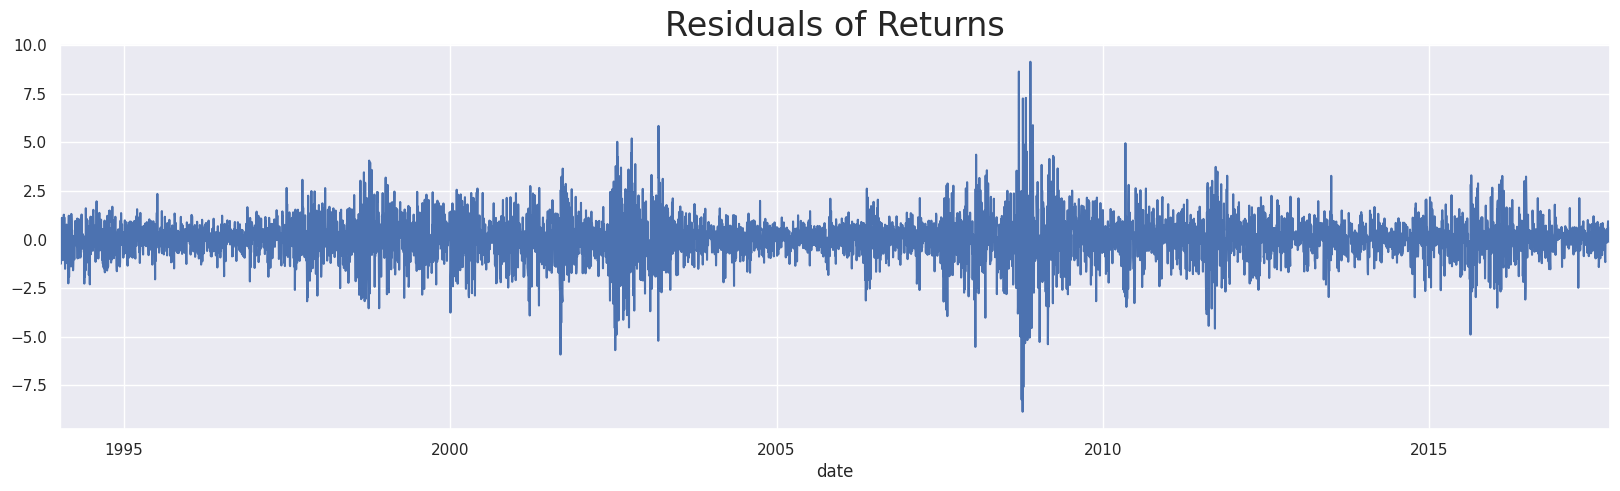

In [ ]:
df.res_ret_arma_8[1:].plot(figsize=(20, 5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar el test ADF a los residuos
result = adfuller(df.res_ret_arma_8[2:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


ADF Statistic: -78.71853111065616
p-value: 0.0
Critical Values:
1%: -3.431405673841931
5%: -2.862006513518873
10%: -2.567018322298507


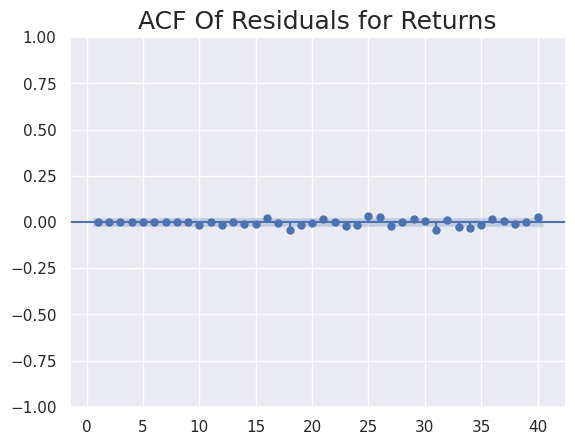

In [ ]:
import statsmodels.api as sm

# Calcular y trazar la ACF de los residuos
sgt.plot_acf(df.res_ret_arma_8[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=18)
plt.show()

Rendimientos Normalizados

In [ ]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)


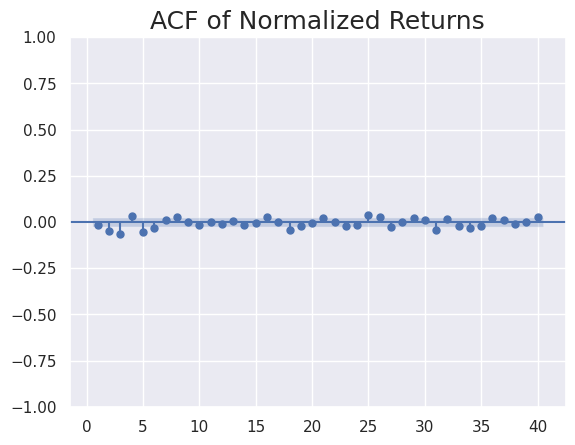

In [ ]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=18)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_norm_ret_arma_8 = ARIMA(df.norm_ret[1:], order=(0, 0, 8))
results_norm_ret_arma_8 = model_norm_ret_arma_8.fit()
print(results_norm_ret_arma_8.summary())


                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -49508.699
Date:                Sat, 14 Oct 2023   AIC                          99037.397
Time:                        19:00:44   BIC                          99104.719
Sample:                    01-10-1994   HQIC                         99060.737
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.311     -1.457      0.145     -28.395       4.183
ma.L1         -0.0197      0.008     -2.373      0.018      -0.036      -0.003
ma.L2         -0.0491      0.007     -6.731      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_norm_ret_arma_8 = ARIMA(df.norm_ret[1:], order=(0, 0, 8))
results_norm_ret_arma_8 = model_norm_ret_arma_8.fit()
print(results_norm_ret_arma_8.summary())


                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -49508.699
Date:                Sat, 14 Oct 2023   AIC                          99037.397
Time:                        19:01:07   BIC                          99104.719
Sample:                    01-10-1994   HQIC                         99060.737
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.311     -1.457      0.145     -28.395       4.183
ma.L1         -0.0197      0.008     -2.373      0.018      -0.036      -0.003
ma.L2         -0.0491      0.007     -6.731      0.0

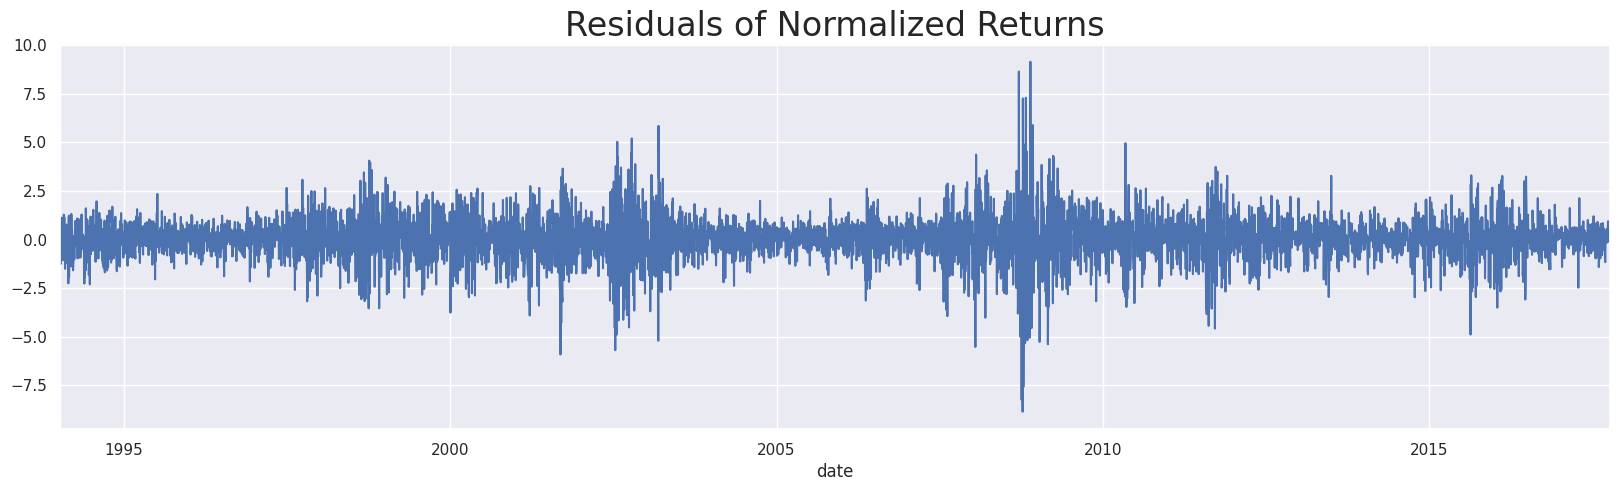

In [ ]:
df['res_ret_arma_8'][1:].plot(figsize=(20, 5))
plt.title("Residuals of Normalized Returns", size=24)
plt.show()

In [ ]:
# Imprime los nombres de las columnas disponibles en tu DataFrame
print(df.columns)

Index(['market_value', 'returns', 'res_ret_arma_8', 'norm_ret'], dtype='object')


Index(['market_value', 'returns', 'res_ret_arma_8', 'norm_ret'], dtype='object')


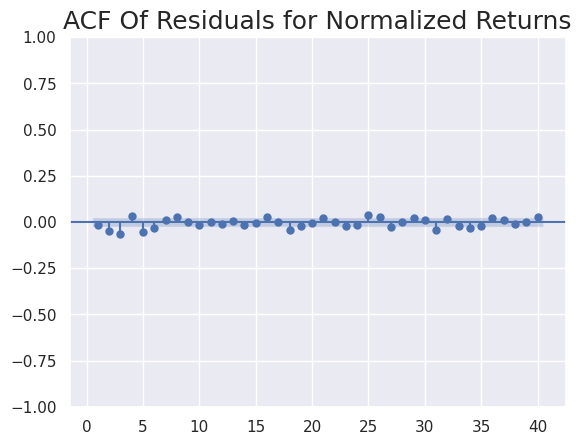

In [ ]:
# Imprime los nombres de las columnas disponibles en tu DataFrame
print(df.columns)

# Utiliza el nombre correcto de la columna de residuos normalizados
sgt.plot_acf(df['norm_ret'][2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Normalized Returns", size=18)
plt.show()

Modelos de MA para precios

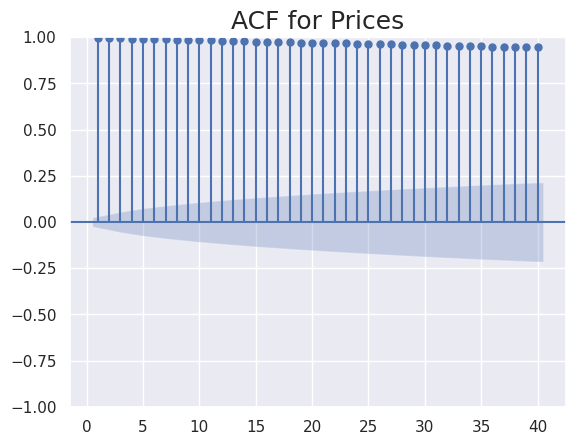

In [ ]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for Prices", size=18)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ma_1 = ARIMA(df.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -48304.630
Date:                Sat, 14 Oct 2023   AIC                          96615.259
Time:                        19:02:41   BIC                          96635.456
Sample:                    01-07-1994   HQIC                         96622.261
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.4038     15.694    343.925      0.000    5366.645    5428.163
ma.L1          0.9633      0.003    279.063      0.000       0.956       0.970
sigma2      3.424e+05   8372.165     40.901      0.0